In [55]:
# rainbow_yu manim_extend.application.page_replacement 🐋✨
# 为操作系统中的页面置换算法动画服务的类

from yty_manim.basic_unit.squ_tex import *
from manim import *

__all__ = (
    "Page",
    "PageReplacement",
    "OptPageReplacement",
    # 保留的接口，可以写入其他页面置换算法
)


class Page(VGroup):
    """
    页面，
    继承于 :class:`~.VGroup` ，

    Notes
    -----

    - 常用于操作系统中页面置换算法的演示

    Examples
    --------

    创建页面:

    >>> class PageTest(Scene):
    >>>     def construct(self):
    >>>         p = Page([7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "],7)
    >>>         self.add(p)
    """
    def __init__(
            self,
            page_lst: list,
            page_frame_num: int = 3,
            one_step=(1.5, 0.45),
            color_lst: list = None,
    ):
        super().__init__()

        self.page_lst = page_lst
        self.one_step = one_step

        if color_lst is None:
            color_lst = [RED, ORANGE, YELLOW, GREEN, TEAL, BLUE, PURPLE]
        self.color_lst = color_lst

        if page_frame_num <= len(self.color_lst):
            self.page_frame_num = page_frame_num
        else:
            raise ValueError("页框数必须小于颜色数")

        self._construct()
        self._add_to_page()

    def _construct(self):
        self.pages = SquTex(self.page_lst, stroke_opacity=0, side_length=self.one_step[0]).scale(self.one_step[1])
        self.page_frame = SquTex(
            ["" for i in range(self.page_frame_num)],
            arrange_direction=DOWN,
            side_length=1,
            fill_color=BLUE,
            fill_opacity=0.5,
            stroke_opacity=0.8,
            color=BLUE
        ).scale(0.45).next_to(self.pages, DOWN, buff=0)
        self.page_frame.shift(LEFT * self.one_step[0] * self.one_step[1] * (len(self.page_lst) / 2))

        self.opt_frame = VGroup()
        for i in range(self.page_frame_num):
            self.page_frame.change_square(i, color=self.color_lst[i])
            opt_squ = Square(side_length=1).set_color(self.color_lst[i]).move_to(self.pages[i]).scale(self.one_step[1])
            self.opt_frame.add(opt_squ)

    def _add_to_page(self):
        self.add(self.pages, self.page_frame, self.opt_frame)


class PageReplacement(Page):
    """
    页面置换，
    继承于 :class:`~.Page` ，

    Notes
    -----

    - 通过保留接口完成页面置换算法每步演示

    Examples
    --------

    页面置换步进:


    """
    def __init__(
            self,
            page_lst: list,
            **kwargs,
    ):
        super().__init__(page_lst, **kwargs)
        self.page_frame_lst = []

    def cal_func(self, step):
        """
        页面置换算法接口，继承后重写课改变页面置换搜索逻辑，
        下面给出几种经典的页面置换算法继承：
         - OPT
         - LRU
         - FIFO
         - CLOCK
         - 改进型CLOCK

        :param step: 当前步骤
        """
        pass

    def step_on(self, step):
        pass


class OptPageReplacement(PageReplacement):
    """
    OPT页面置换算法
    """
    def cal_func(self, step):
        def get_opt(step):
            for i in range(step + 1, len(self.page_lst)):
                if self.page_lst[step] == self.page_lst[i]:
                    return i
            return len(self.page_lst) - 1

        if len(self.page_lst) < self.page_frame_num:
            self.page_frame_lst.append(get_opt(step))
            return step, get_opt(step)
        else:
            for j in range(self.page_frame_num):
                if self.page_lst[step] == self.page_lst[self.page_frame_lst[j]]:
                    self.page_frame_lst[j] = get_opt(step)
                    return j, get_opt(step)


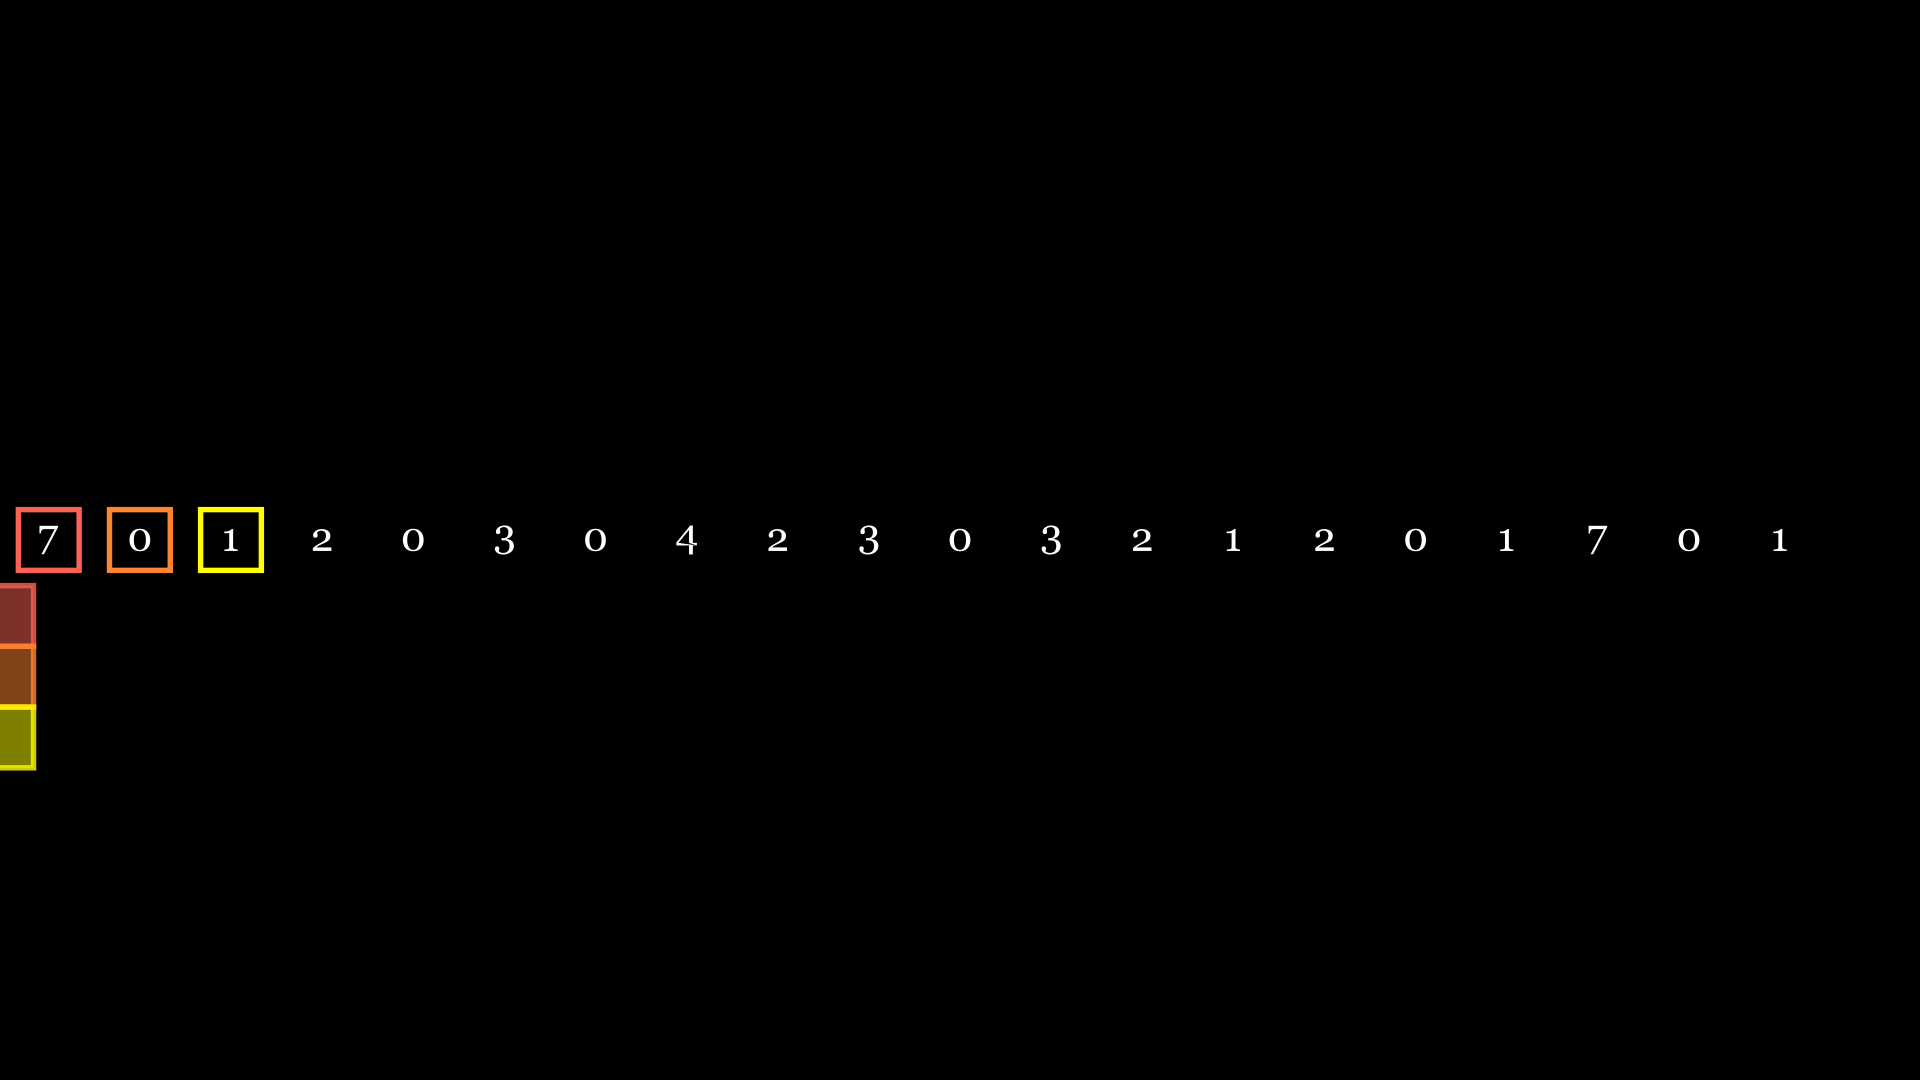

In [58]:
%%manim -qh -v WARNING PageTest
class PageTest(Scene):
    def construct(self):
        p = Page([7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "],3)
        self.add(p)